In [95]:
pip install pyppeteer

                                              0.0/83.4 kB ? eta -:--:--
     ----                                     10.2/83.4 kB ? eta -:--:--
     --------------                         30.7/83.4 kB 217.9 kB/s eta 0:00:01
     ----------------------------           61.4/83.4 kB 365.7 kB/s eta 0:00:01
     -------------------------------------- 83.4/83.4 kB 425.2 kB/s eta 0:00:00
                                              0.0/77.1 kB ? eta -:--:--
     ---------------------                    41.0/77.1 kB ? eta -:--:--
     ---------------------------------------- 77.1/77.1 kB 1.5 MB/s eta 0:00:00
                                              0.0/101.4 kB ? eta -:--:--
     -----------------------                 61.4/101.4 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 101.4/101.4 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [44]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
import logging
import os 

In [45]:
#Create a header to stop blocking of ip form google
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"}

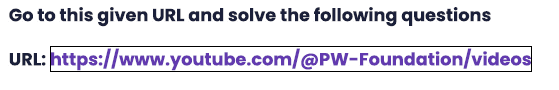

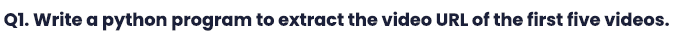

In [50]:
url = "https://www.youtube.com/@PW-Foundation/videos"

response = requests.get(url)
print(response)

soup = BeautifulSoup(response.content, "html.parser")
print(soup)


<Response [200]>
<!DOCTYPE html>
<html darker-dark-theme="" darker-dark-theme-deprecate="" lang="en-GB" style="font-size: 10px;font-family: Roboto, Arial, sans-serif;" system-icons="" typography="" typography-spacing=""><head><script data-id="_gd" nonce="pbnsmsYsaLwCI0iam53PNw">window.WIZ_global_data = {"MuJWjd":false,"nQyAE":{},"oxN3nb":{"1":false}};</script><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="ApvK67ociHgr2egd6c2ZjrfPuRs8BHcvSggogIOPQNH7GJ3cVlyJ1NOq/COCdj0+zxskqHt9HgLLETc8qqD+vwsAAABteyJvcmlnaW4iOiJodHRwczovL3lvdXR1YmUuY29tOjQ0MyIsImZlYXR1cmUiOiJQcml2YWN5U2FuZGJveEFkc0FQSXMiLCJleHBpcnkiOjE2OTUxNjc5OTksImlzU3ViZG9tYWluIjp0cnVlfQ==" http-equiv="origin-trial"/><script nonce="pbnsmsYsaLwCI0iam53PNw">var ytcfg={d:function(){return window.yt&&yt.config_||ytcfg.data_||(ytcfg.data_={})},get:function(k,o){return k in ytcfg.d()?ytcfg.d()[k]:o},set:function(){var a=arguments;if(a.length>1)ytcfg.d()[a[0]]=a[1];else{var k;for(k in a[0])ytcfg.d()[k]=a[0][k]}}};
wind

In [100]:
videos = soup.find_all("video")
videos2 = soup.find_all("a", class_="yt-simple-endpoint style-scope ytd-grid-video-renderer")
print(videos)

print(videos2)

# for video in videos:
#     if "/watch?v=" in video["href"]:
#         video_url = "https://www.youtube.com" + video["href"]
#         print(video_url)

# List of all video tag
video_tags = soup.findAll('video')
print("Total ", len(video_tags), "videos found")

if len(video_tags) != 0:
    for video_tag in video_tags:
        video_url = video_tag.find("a")['href']
        print(video_url)
else:
    print("no videos found")


[]
[]
Total  0 videos found
no videos found


In [80]:

url = 'https://www.youtube.com/@PW-Foundation/videos'
reqs = requests.get(url)
soup = BeautifulSoup(reqs.text, 'html.parser')

urls = []
for link in soup.find_all('a'):
    print(link.get('href'))


/
/
https://www.youtube.com/about/
https://www.youtube.com/about/press/
https://www.youtube.com/about/copyright/
/t/contact_us/
https://www.youtube.com/creators/
https://www.youtube.com/ads/
https://developers.google.com/youtube
/t/terms
/t/privacy
https://www.youtube.com/about/policies/
https://www.youtube.com/howyoutubeworks?utm_campaign=ytgen&utm_source=ythp&utm_medium=LeftNav&utm_content=txt&u=https%3A%2F%2Fwww.youtube.com%2Fhowyoutubeworks%3Futm_source%3Dythp%26utm_medium%3DLeftNav%26utm_campaign%3Dytgen
/new


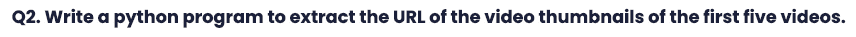

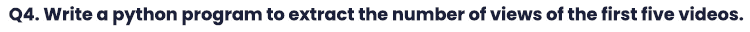

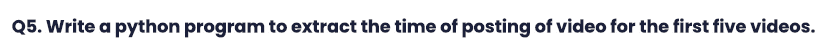

## The page link directs to contains no link to it videos so we use pypputeer 

In [110]:
import tracemalloc
import csv
import asyncio
import pyppeteer


In [111]:
tracemalloc.start()

async def get_video_urls(channel_url):
  browser = await pyppeteer.launch()
  page = await browser.newPage()
  await page.goto(channel_url)

  video_urls = []
  for i in range(5):
    video = await page.querySelector('video.ytd-video-renderer')
    if video:
      url = await video.getAttribute('href')
      video_urls.append(url)

  await browser.close()
  return video_urls

video_urls = await get_video_urls('https://www.youtube.com/@PW-Foundation/videos')
for url in video_urls:
  print(url)


In [108]:
async def get_video_info(channel_url):
    browser = await pyppeteer.launch()
    page = await browser.newPage()
    await page.goto(channel_url)

    video_infos = []
    for i in range(5):
        video = await page.querySelector('ytd-grid-video-renderer')
        if video:
            url = await page.evaluate('(element) => element.querySelector("a#thumbnail")?.href', video)
            thumbnail_url = await page.evaluate('(element) => element.querySelector("img#img")?.src', video)
            title = await page.evaluate('(element) => element.querySelector("h3#title")?.textContent', video)
            views = await page.evaluate('(element) => element.querySelector("span#view-count")?.textContent', video)
            time_of_posting = await page.evaluate('(element) => element.querySelector("span#time")?.textContent', video)
            video_infos.append({
                'url': url,
                'thumbnail_url': thumbnail_url,
                'title': title,
                'views': views,
                'time_of_posting': time_of_posting,
            })

    await browser.close()
    return video_infos


In [42]:
async def main():
    channel_url = 'https://www.youtube.com/@PW-Foundation/videos'
    try:
        video_infos = await get_video_info(channel_url)
    except RuntimeError:
        print('The event loop is already running.')

    csv_file = 'video_infos.csv'
    with open(csv_file, 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['url', 'thumbnail_url', 'title', 'views', 'time_of_posting'])
        for video_info in video_infos:
            writer.writerow(video_info.values())

    # Create an event loop and run the program within it
    loop = asyncio.get_event_loop()
    try:
        loop.run_until_complete(main())
    finally:
        loop.close()
